## Project
    - Retrival Augmented Generation (RAG)
    - Build Chatbot
    
- document loading: 80 unique loades LangChain provides
- Document splitting: best practices in document splitting
- Vector stores and embeddings: vector store integrations with LangChain
- Retrival: accessing and indexing data in vector store
- Question Answering: 
- Chat: chatbot using LangChain

## LangChain
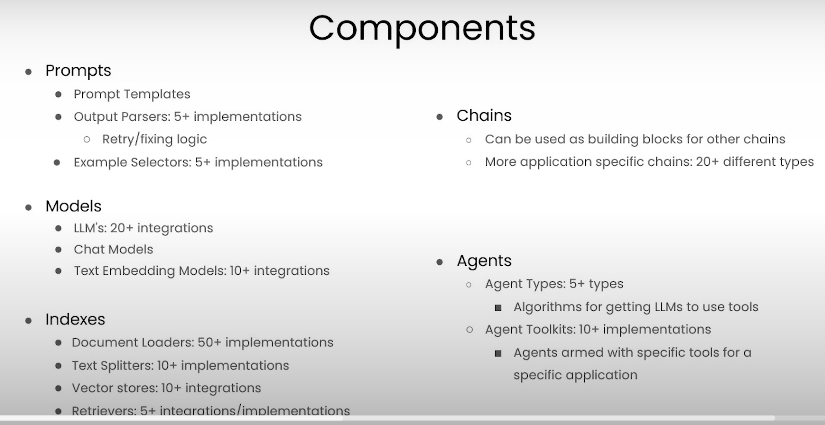

- How to load data
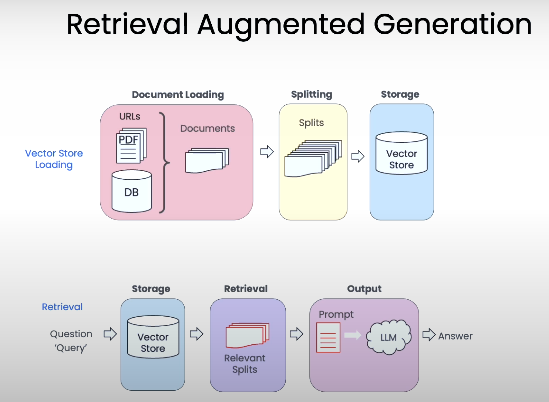
- document -> splitting document -> storing in vector databases
- symanic search
- memory: fully functional data